In [181]:
import pickle
import numpy as np
import math
from IPython.display import display
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
# loading pickled dataset
with open('train.p', 'rb') as f:
    data = pickle.load(f)

# Load the feature data to the variable X_train  
# Load the label data to the variable Y_train
X_train, Y_train = data['features'], data['labels']

# 'features' is a 4D array containing raw pixel data of the traffic sign images, 
# (num examples, width, height, channels).
print ('X_train shape: {}'.format(X_train.shape))
# 'labels' is a 2D array containing the label/class id of the traffic sign. 
print ('Y_train shape: {}'.format(Y_train.shape))
# number of training set
print ('Number of training data: {}'.format(len(X_train)))
# showing image shape
print ('Image shape: {}'.format(X_train.shape[1:]))
# number of class
print ('Number of classes: {}'.format(len(set(Y_train))))


X_train shape: (39209, 32, 32, 3)
Y_train shape: (39209,)
Number of training data: 39209
Image shape: (32, 32, 3)
Number of classes: 43


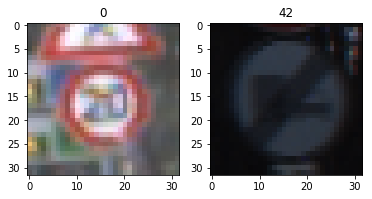

In [183]:
# Visualizing dataset
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('{}'.format(Y_train[0]))
plt.subplot(1, 2, 2)
plt.imshow(X_train[39208])
plt.title('{}'.format(Y_train[39208]))
plt.show()

In [184]:

label_file = 'signnames.csv'
label = pd.read_csv(label_file)
display(label.head())
ClassId = label['ClassId']
SignName = label['SignName']
print (SignName.head())


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


0    Speed limit (20km/h)
1    Speed limit (30km/h)
2    Speed limit (50km/h)
3    Speed limit (60km/h)
4    Speed limit (70km/h)
Name: SignName, dtype: object


In [185]:
# Making sure to pass these tests. 
assert np.array_equal(X_train, data['features']), 'X_train not set to data[\'features\'].'
assert np.array_equal(Y_train, data['labels']), 'Y_train not set to data[\'labels\'].'
print('Data shape tests passed.')

Data shape tests passed.


In [186]:
# Shuffle the data
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

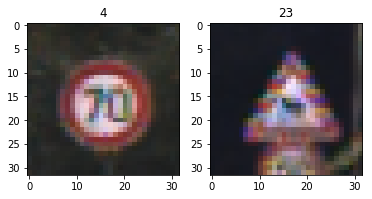

Data shuffling tests passed.


In [187]:
# Checking training data shape and whether the data is shuffled. 
assert X_train.shape == data['features'].shape, 'X_train has changed shape. The shape shouldn\'t change when shuffling.'
assert Y_train.shape == data['labels'].shape, 'Y_train has changed shape. The shape shouldn\'t change when shuffling.'
assert not np.array_equal(X_train, data['features']), 'X_train not shuffled.'
assert not np.array_equal(Y_train, data['labels']), 'Y_train not shuffled.'
# visualize shuffled data
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('{}'.format(Y_train[0]))
plt.subplot(1, 2, 2)
plt.imshow(X_train[39208])
plt.title('{}'.format(Y_train[39208]))
plt.show()
print('Data shuffling tests passed.')

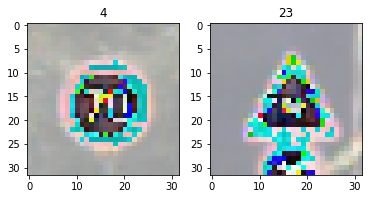

In [188]:
# Implement Min-Max scaling in the normalize() function to a range of a = -0.5 and b = 0.5. 
# After scaling, the values of the pixels in the input data should range from -0.5 to 0.5.

def normalize_grayscale(image_data):
    a = -0.5
    b = 0.5
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_normalized = normalize_grayscale(X_train)
# plot normalized data
plt.subplot(1, 2, 1)
plt.imshow(X_normalized[0])
plt.title('{}'.format(Y_train[0]))
plt.subplot(1, 2, 2)
plt.imshow(X_normalized[39208])
plt.title('{}'.format(Y_train[39208]))
plt.show()


In [18]:
# Check if data is normalized to range -0.5 to 0.5
assert math.isclose(np.min(X_normalized), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_normalized), 0.5, abs_tol=1e-5), 'The range of the training data is: {} to {}.  It must be -0.5 to 0.5'.format(np.min(X_normalized), np.max(X_normalized))
print('Normalization tests passed.')

Normalization tests passed.


In [19]:
# One-Hot encode the labels to the variable y_one_hot
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(Y_train)
display(y_one_hot[0])
display(y_one_hot[39208])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# Checking ONE-HOT shape
import collections
assert y_one_hot.shape == (39209, 43), 'y_one_hot is not the correct shape.  It\'s {}, it should be (39209, 43)'.format(y_one_hot.shape)
assert next((False for y in y_one_hot if collections.Counter(y) != {0: 42, 1: 1}), True), 'y_one_hot not one-hot encoded.'
print('ONE-HOT encoding tests passed.')

ONE-HOT encoding tests passed.


In [46]:
from keras.models import Sequential
model = Sequential()
# Build a Multi-layer feedforward neural network with Keras here.
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.activations import relu, softmax

# Set the first layer to a Flatten layer with the input_shape set to (32, 32, 3)
model.add(Flatten(input_shape=(32, 32, 3)))
# Set the second layer to Dense layer width to 128 output.
model.add(Dense(128))
# Use a ReLU activation function after the second layer.
model.add(Activation('relu'))
# Set the output layer width to 43, since there are 43 classes in the dataset.
model.add(Dense(43))
# Use a softmax activation function after the output layer.
model.add(Activation('softmax'))

print ('{} layers total'.format(len(model.layers)))
model.summary()

5 layers total
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_13 (Flatten)             (None, 3072)          0           flatten_input_5[0][0]            
____________________________________________________________________________________________________
dense_25 (Dense)                 (None, 128)           393344      flatten_13[0][0]                 
____________________________________________________________________________________________________
activation_33 (Activation)       (None, 128)           0           dense_25[0][0]                   
____________________________________________________________________________________________________
dense_26 (Dense)                 (None, 43)            5547        activation_33[0][0]              
____________________________________________________________________________

In [47]:
# Checking Keras layers

def check_layers(layers, true_layers):
    assert len(true_layers) != 0, 'No layers found'
    for layer_i in range(len(layers)):
        assert isinstance(true_layers[layer_i], layers[layer_i]), 'Layer {} is not a {} layer'.format(layer_i+1, layers[layer_i].__name__)
    assert len(true_layers) == len(layers), '{} layers found, should be {} layers'.format(len(true_layers), len(layers))

check_layers([Flatten, Dense, Activation, Dense, Activation], model.layers)

assert model.layers[0].input_shape == (None, 32, 32, 3), 'First layer input shape is wrong, it should be (32, 32, 3)'
assert model.layers[1].output_shape == (None, 128), 'Second layer output is wrong, it should be (128)'
assert model.layers[2].activation == relu, 'Third layer not a relu activation layer'
assert model.layers[3].output_shape == (None, 43), 'Fourth layer output is wrong, it should be (43)'
assert model.layers[4].activation == softmax, 'Fifth layer not a softmax activation layer'
print('Keras layers tests passed.')

Keras layers tests passed.


In [48]:
# Compile the network using adam optimizer and categorical_crossentropy loss function
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

# Train the network for ten epochs and validate with 20% of the training data.
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
1s - loss: 1.7588 - acc: 0.5404 - val_loss: 1.2869 - val_acc: 0.6144
Epoch 2/10
0s - loss: 0.8690 - acc: 0.7741 - val_loss: 0.8322 - val_acc: 0.7451
Epoch 3/10
0s - loss: 0.6089 - acc: 0.8428 - val_loss: 0.5887 - val_acc: 0.8373
Epoch 4/10
0s - loss: 0.4916 - acc: 0.8724 - val_loss: 0.5006 - val_acc: 0.8643
Epoch 5/10
0s - loss: 0.4026 - acc: 0.8987 - val_loss: 0.6775 - val_acc: 0.8143
Epoch 6/10
0s - loss: 0.3764 - acc: 0.9010 - val_loss: 0.4642 - val_acc: 0.8582
Epoch 7/10
0s - loss: 0.3233 - acc: 0.9152 - val_loss: 0.3305 - val_acc: 0.9259
Epoch 8/10
0s - loss: 0.2830 - acc: 0.9269 - val_loss: 0.6268 - val_acc: 0.8013
Epoch 9/10
0s - loss: 0.2812 - acc: 0.9240 - val_loss: 0.5368 - val_acc: 0.8500
Epoch 10/10
0s - loss: 0.2628 - acc: 0.9295 - val_loss: 0.3606 - val_acc: 0.8949


In [49]:
from keras.optimizers import Adam

assert model.loss == 'categorical_crossentropy', 'Not using categorical_crossentropy loss function'
assert isinstance(model.optimizer, Adam), 'Not using adam optimizer'
assert len(history.history['acc']) == 10, 'You\'re using {} epochs when you need to use 10 epochs.'.format(len(history.history['acc']))

assert history.history['acc'][-1] > 0.92, 'The training accuracy was: %.3f. It shoud be greater than 0.92' % history.history['acc'][-1]
assert history.history['val_acc'][-1] > 0.85, 'The validation accuracy is: %.3f. It shoud be greater than 0.85' % history.history['val_acc'][-1]
print('acc = {}'.format(history.history['acc'][-1]))
print('val_acc = {}'.format(history.history['val_acc'][-1]))
print('Tests passed.')

acc = 0.9295437880575127
val_acc = 0.8949247642580085
Tests passed.


In [50]:
# Re-construct the network
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D

model = Sequential()
# Add a convolutional layer with 32 filters, a 3x3 kernel, and valid padding before the flatten layer.
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
# Add a ReLU activation after the convolutional layer.
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))
print ('{} layers total'.format(len(model.layers)))
model.summary()

7 layers total
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_9 (Convolution2D)  (None, 30, 30, 32)    896         convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
activation_35 (Activation)       (None, 30, 30, 32)    0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
flatten_14 (Flatten)             (None, 28800)         0           activation_35[0][0]              
____________________________________________________________________________________________________
dense_27 (Dense)                 (None, 128)           3686528     flatten_14[0][0]                 
____________________________________________________________________________

In [51]:
# check Keras layers again

check_layers([Convolution2D, Activation, Flatten, Dense, Activation, Dense, Activation], model.layers)

assert model.layers[0].input_shape == (None, 32, 32, 3), 'First layer input shape is wrong, it should be (32, 32, 3)'
assert model.layers[0].nb_filter == 32, 'Wrong number of filters, it should be 32'
assert model.layers[0].nb_col == model.layers[0].nb_row == 3, 'Kernel size is wrong, it should be a 3x3'
assert model.layers[0].border_mode == 'valid', 'Wrong padding, it should be valid'

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=2, validation_split=0.2, verbose=2)
assert(history.history['val_acc'][-1] > 0.91), "The validation accuracy is: %.3f.  It should be greater than 0.91" % history.history['val_acc'][-1]
print('acc = {}'.format(history.history['acc'][-1]))
print('val_acc = {}'.format(history.history['val_acc'][-1]))
print('Keras layers tests passed.')

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
3s - loss: 1.1429 - acc: 0.7068 - val_loss: 0.4471 - val_acc: 0.8897
Epoch 2/2
3s - loss: 0.2833 - acc: 0.9317 - val_loss: 0.2721 - val_acc: 0.9234
acc = 0.9317116715018969
val_acc = 0.9233613874163745
Keras layers tests passed.


In [52]:
from keras.layers.pooling import MaxPooling2D
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
# Add a 2x2 max pooling layer following the convolutional layer.
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))
print ('{} layers total'.format(len(model.layers)))
model.summary()

8 layers total
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_10 (Convolution2D) (None, 30, 30, 32)    896         convolution2d_input_10[0][0]     
____________________________________________________________________________________________________
maxpooling2d_6 (MaxPooling2D)    (None, 15, 15, 32)    0           convolution2d_10[0][0]           
____________________________________________________________________________________________________
activation_38 (Activation)       (None, 15, 15, 32)    0           maxpooling2d_6[0][0]             
____________________________________________________________________________________________________
flatten_15 (Flatten)             (None, 7200)          0           activation_38[0][0]              
____________________________________________________________________________

In [53]:

check_layers([Convolution2D, MaxPooling2D, Activation, Flatten, Dense, Activation, Dense, Activation], model.layers)
assert model.layers[1].pool_size == (2, 2), 'Second layer must be a max pool layer with pool size of 2x2'

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=2, validation_split=0.2, verbose=2)
assert(history.history['val_acc'][-1] > 0.91), "The validation accuracy is: %.3f.  It should be greater than 0.91" % history.history['val_acc'][-1]
print('acc = {}'.format(history.history['acc'][-1]))
print('val_acc = {}'.format(history.history['val_acc'][-1]))
print('Keras layers tests passed.')

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
2s - loss: 1.4269 - acc: 0.6333 - val_loss: 0.6694 - val_acc: 0.8082
Epoch 2/2
2s - loss: 0.3865 - acc: 0.9082 - val_loss: 0.3519 - val_acc: 0.9144
acc = 0.9081837600025504
val_acc = 0.9144350932557131
Keras layers tests passed.


In [54]:
from keras.layers.core import Dense, Activation, Flatten, Dropout

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# Add a dropout layer after the pooling layer. Set the dropout rate to 50%.
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))
print ('{} layers total'.format(len(model.layers)))
model.summary()

9 layers total
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_11 (Convolution2D) (None, 30, 30, 32)    896         convolution2d_input_11[0][0]     
____________________________________________________________________________________________________
maxpooling2d_7 (MaxPooling2D)    (None, 15, 15, 32)    0           convolution2d_11[0][0]           
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 15, 15, 32)    0           maxpooling2d_7[0][0]             
____________________________________________________________________________________________________
activation_41 (Activation)       (None, 15, 15, 32)    0           dropout_5[0][0]                  
____________________________________________________________________________

In [55]:
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

check_layers([Convolution2D, MaxPooling2D, Dropout, Activation, Flatten, Dense, Activation, Dense, Activation], model.layers)
assert model.layers[2].p == 0.5, 'Third layer should be a Dropout of 50%'

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=2, validation_split=0.2, verbose=2)
assert(history.history['val_acc'][-1] > 0.91), "The validation accuracy is: %.3f.  It should be greater than 0.91" % history.history['val_acc'][-1]
print('acc = {}'.format(history.history['acc'][-1]))
print('val_acc = {}'.format(history.history['val_acc'][-1]))
print('Keras layers tests passed.')

Train on 31367 samples, validate on 7842 samples
Epoch 1/2
2s - loss: 1.6536 - acc: 0.5590 - val_loss: 0.7540 - val_acc: 0.8221
Epoch 2/2
2s - loss: 0.5524 - acc: 0.8556 - val_loss: 0.3792 - val_acc: 0.9192
acc = 0.855580705837345
val_acc = 0.9191532772403991
Keras layers tests passed.


In [56]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))
model.summary()

# Compile and train the model
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=10, validation_split=0.2, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_12 (Convolution2D) (None, 30, 30, 32)    896         convolution2d_input_12[0][0]     
____________________________________________________________________________________________________
maxpooling2d_8 (MaxPooling2D)    (None, 15, 15, 32)    0           convolution2d_12[0][0]           
____________________________________________________________________________________________________
dropout_6 (Dropout)              (None, 15, 15, 32)    0           maxpooling2d_8[0][0]             
____________________________________________________________________________________________________
activation_44 (Activation)       (None, 15, 15, 32)    0           dropout_6[0][0]                  
___________________________________________________________________________________________

In [57]:
with open('test.p', 'rb') as f:
    data_test = pickle.load(f)

X_test = data_test['features']
y_test = data_test['labels']

# TODO: Preprocess data & one-hot encode the labels
X_normalized_test = normalize_grayscale(X_test)
y_one_hot_test = label_binarizer.fit_transform(y_test)

# TODO: Evaluate model on test data
metrics = model.evaluate(X_normalized_test, y_one_hot_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

12032/12630 [===========================>..] - ETA: 0sloss: 0.42587822306656403
acc: 0.9045922407911395
